In [1]:
pip install mglearn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ----- --------------------------------- 81.9/581.4 kB 573.4 kB/s eta 0:00:01
   ----------- -------------------------- 174.1/581.4 kB 871.5 kB/s eta 0:00:01
   ------------ ------------------------- 194.6/581.4 kB 908.0 kB/s eta 0:00:01
   ------------ ------------------------- 194.6/581.4 kB 908.0 kB/s eta 0:00:01
   ---------------------- ----------------- 327.7/581.4 kB 1.0 MB/s eta 0:00:01
   ------------------------ ------------- 368.6/581.4 kB 995.6 kB/s eta 0:00:01
   ------------------------------ --------- 450.6/581.4 kB 1.0 MB/s eta 0:00:01
   --------------

In [9]:

%matplotlib inline
import matplotlib.pyplot as plt


X.shape: (26, 2)


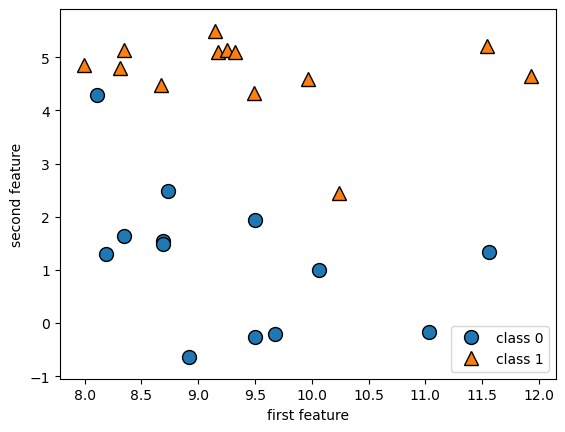

In [12]:
import mglearn
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape:",X.shape)

Text(0, 0.5, 'Target')

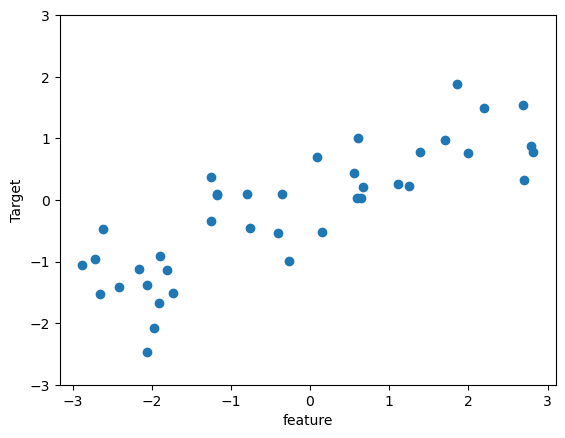

In [13]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("Target")
         

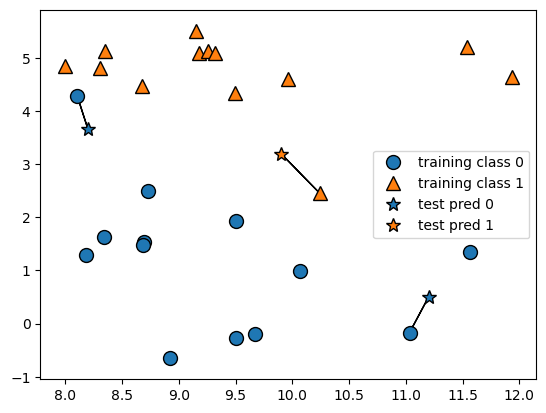

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

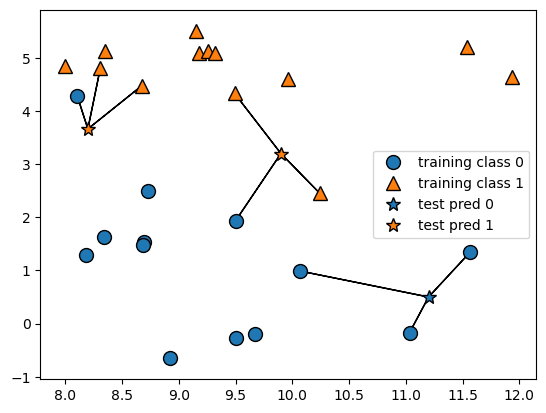

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [20]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
display(X)
display(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [22]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
print("Test set predictions:",clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [25]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy:0.86


In [26]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("keys of cancet dataset:\n",cancer.keys())

keys of cancet dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
print("Shape of data:",cancer['data'].shape)

Shape of data: (569, 30)


In [30]:
print("Target names",cancer['target_names'])

Target names ['malignant' 'benign']


In [33]:
print("Feature name:",cancer['feature_names'])

Feature name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [36]:
import numpy as np
print("sample counts per class:\n",{n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))})

sample counts per class:
 {'malignant': 212, 'benign': 357}


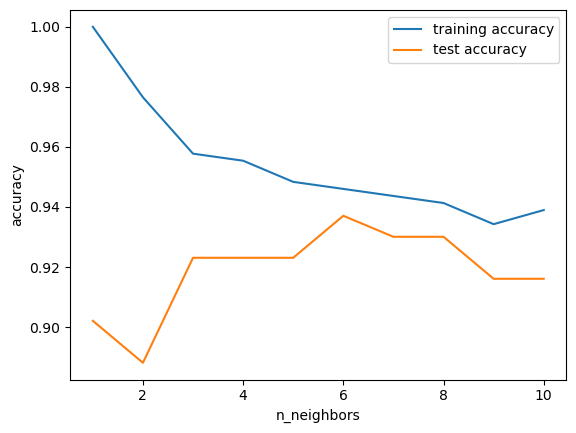

In [43]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)
for n_neighbors1 in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors1)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()